# Uber Trips Analysis in Python
Analyzing Uber trips can provide valuable insights into ride patterns, helping optimize services and improve customer experiences. In this project, we will analyze Uber ride data to detect patterns and relationships between different variables using Python. We’ll perform data exploration, uncover hidden patterns, and visualize the relationships discovered in the data.

# Task Overview
## Objective:-
Analyze Uber rides to detect patterns and relationships between different variables using Python.

### Importing necessary libraries


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset :-

In [3]:

uber_data= pd.read_csv("C:\\Users\\ganes\\OneDrive\\Python-Projects-Uber-Trips-Analysis\\Data\\uber_data.csv")

#Display the first 5 records
uber_data.head(5)

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [4]:
#Display the last 5 records
uber_data.tail()

,Date/Time,Lat,Lon,Base
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764
1028135,9/30/2014 22:58:00,40.7140,-73.9496,B02764


In [5]:
#Find the shape of the dataset
uber_data.shape

(1028136, 4)

In [6]:
#Understand the dataset properties
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB


# Data Analysis and Visualization
## Pattern Dettection,Relationship identification, Graphs and Charts

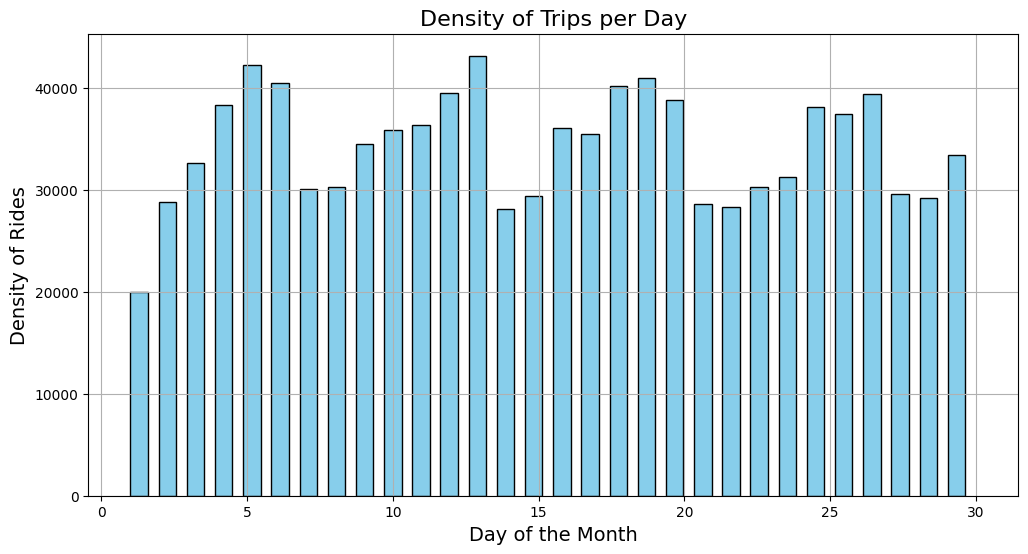

In [7]:
# Parse the Date/Time column to datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Extract the day of the month
uber_data['Day'] = uber_data['Date/Time'].dt.day

# Visualize the density of rides per day of the month
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber_data['Day'], width=0.6, bins=30, color='skyblue', edgecolor='black')
plt.title("Density of Trips per Day", fontsize=16)
plt.xlabel("Day of the Month", fontsize=14)
plt.ylabel("Density of Rides", fontsize=14)
plt.grid(True)
plt.show()


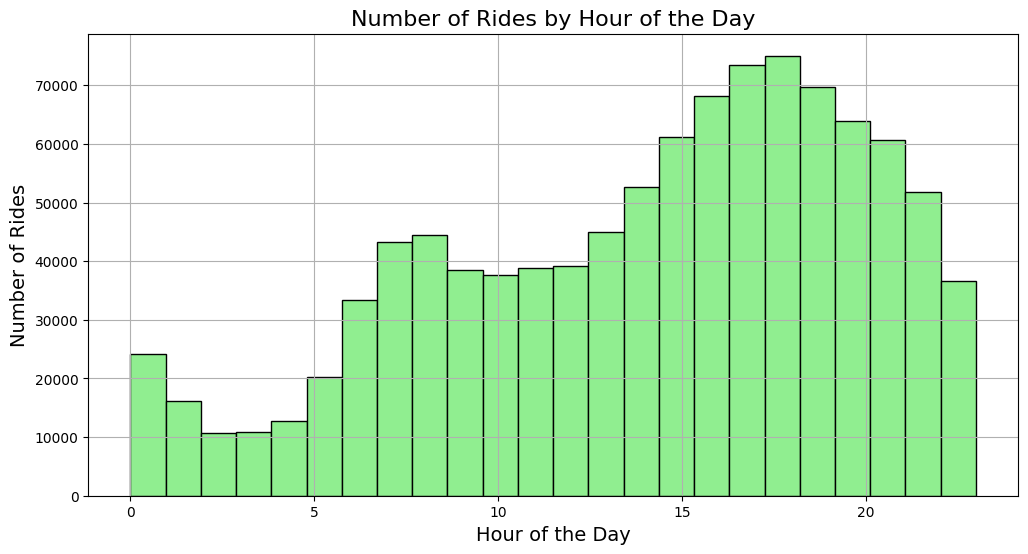

In [8]:
# Extract the hour from the Date/Time
uber_data['Hour'] = uber_data['Date/Time'].dt.hour

# Visualize the number of rides by hour of the day
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(uber_data['Hour'], bins=24, color='lightgreen', edgecolor='black')
plt.title("Number of Rides by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Number of Rides", fontsize=14)
plt.grid(True)
plt.show()


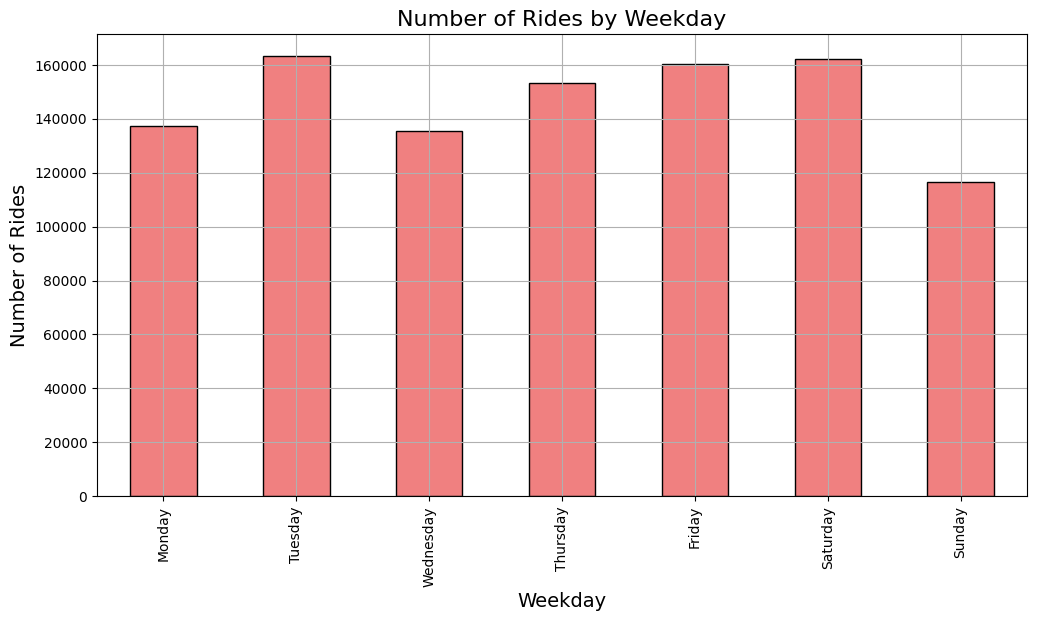

In [9]:
# Extract the weekday from the Date/Time
uber_data['Weekday'] = uber_data['Date/Time'].dt.day_name()

# Visualize the number of rides by weekday
fig, ax = plt.subplots(figsize=(12, 6))
uber_data['Weekday'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title("Number of Rides by Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Number of Rides", fontsize=14)
plt.grid(True)
plt.show()


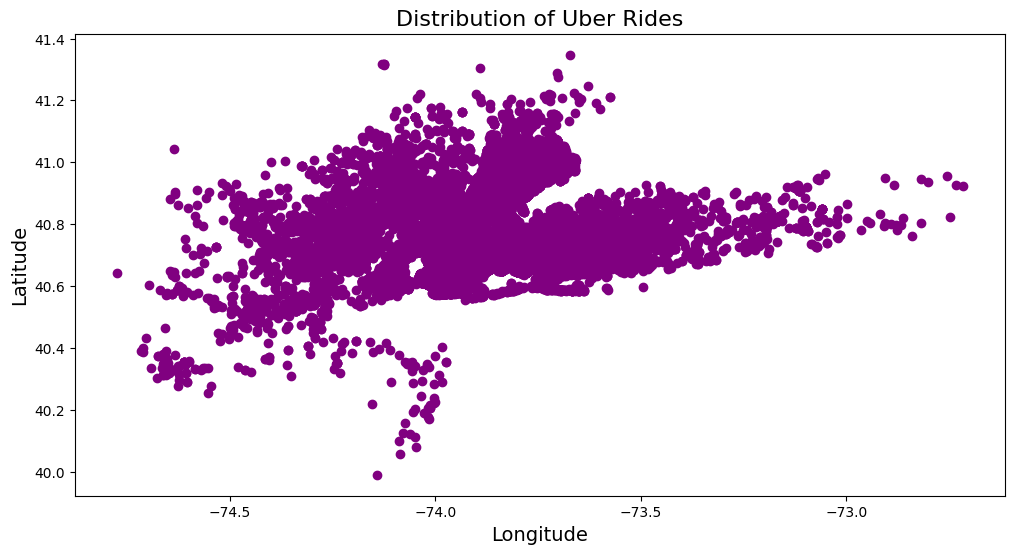

In [10]:
import matplotlib.pyplot as plt

# Assuming uber_data is your DataFrame containing Lon and Lat

fig, ax = plt.subplots(figsize=(12, 6))
x = uber_data.Lon
y = uber_data.Lat

# Plot the rides as purple scattered points
plt.scatter(x, y, color="purple")

# Title: Focus on location, not density or hour (data not shown for density) 
plt.title("Distribution of Uber Rides", fontsize=16)

# X-axis label: Shows longitude
plt.xlabel("Longitude", fontsize=14)

# Y-axis label: Shows latitude
plt.ylabel("Latitude", fontsize=14)

# Display the plot
plt.show()


In [11]:
# Calculating the correlation between Lat and Lon
correlation = uber_data['Lat'].corr(uber_data['Lon'])

# Displaying the correlation
print(f'Correlation between Latitude and Longitude: {correlation:.2f}')


Correlation between Latitude and Longitude: 0.05


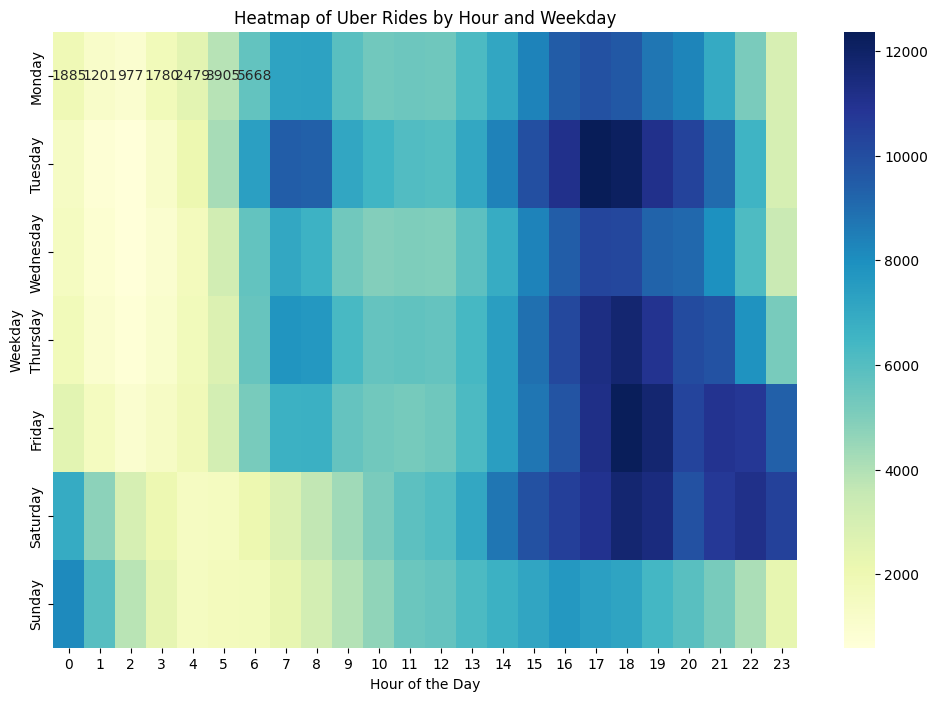

In [12]:
# Creating a pivot table for the heatmap
heatmap_data = uber_data.pivot_table(index='Weekday', columns='Hour', values='Date/Time', aggfunc='count', fill_value=0)

# Reordering the days of the week
heatmap_data = heatmap_data.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of Uber Rides by Hour and Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('Weekday')
plt.show()


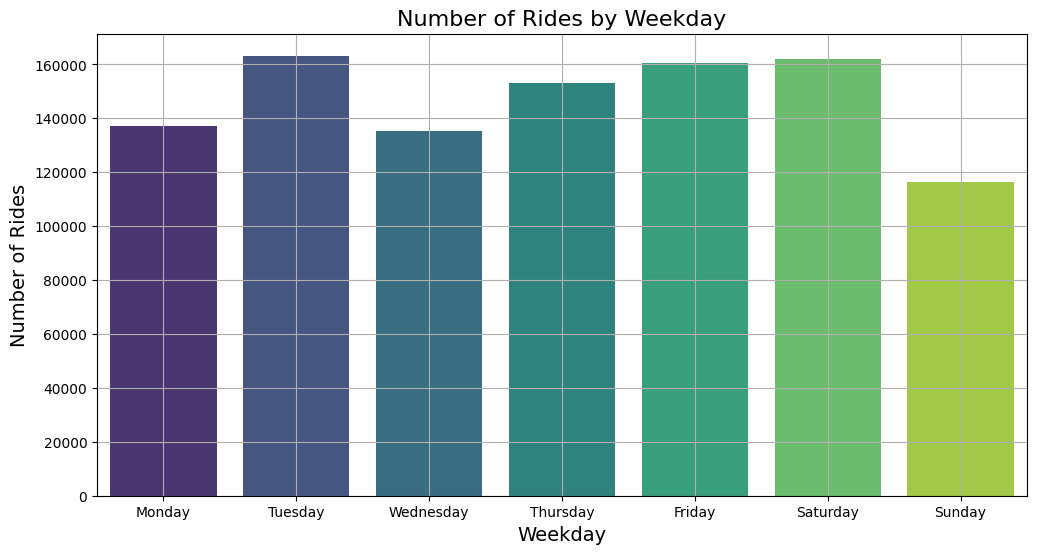

In [13]:
# Extract the weekday from the Date/Time
uber_data['Weekday'] = uber_data['Date/Time'].dt.day_name()

# Visualize the number of rides by weekday
plt.figure(figsize=(12, 6))
sns.countplot(x=uber_data['Weekday'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
plt.title("Number of Rides by Weekday", fontsize=16)
plt.xlabel("Weekday", fontsize=14)
plt.ylabel("Number of Rides", fontsize=14)
plt.grid(True)
plt.show()


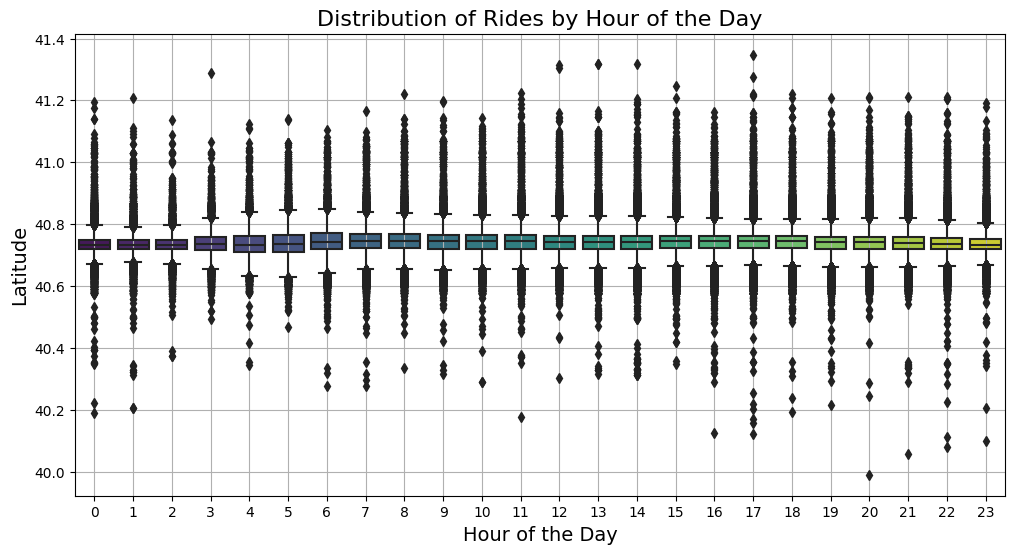

In [14]:
# Extract the hour from the Date/Time
uber_data['Hour'] = uber_data['Date/Time'].dt.hour

# Visualize the distribution of rides by hour of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x=uber_data['Hour'], y=uber_data['Lat'], palette='viridis')
plt.title("Distribution of Rides by Hour of the Day", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.grid(True)
plt.show()


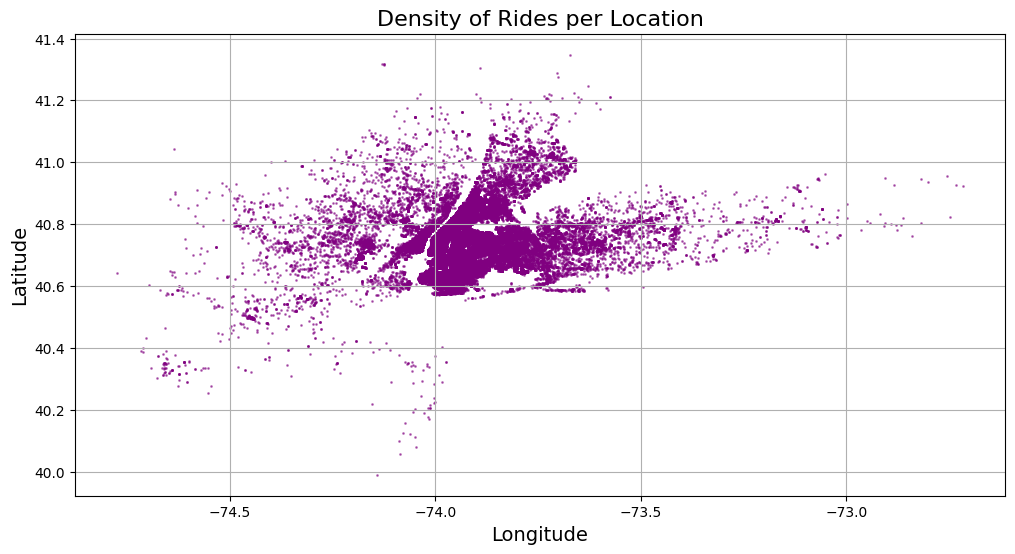

In [15]:
# Parse the Date/Time column to datetime
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'])

# Scatter plot of rides per location
fig, ax = plt.subplots(figsize=(12, 6))
x = uber_data['Lon']
y = uber_data['Lat']
plt.scatter(x, y, color='purple', alpha=0.5, s=1)  # Added transparency and smaller size for better visualization
plt.title("Density of Rides per Location", fontsize=16)
plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.grid(True)
plt.show()




##  Data Loading and Exploration:

### Data Loading:
The code begins by loading the Uber trips dataset from the specified file path using pandas `read_csv()` function.

### Data Exploration:
1. **Displaying the First 5 Records**: `uber_data.head(5)` - This displays the first 5 records of the dataset.
2. **Displaying the Last 5 Records**: `uber_data.tail()` - This displays the last 5 records of the dataset.
3. **Finding the Shape of the Dataset**: `uber_data.shape` - This returns the shape of the dataset, indicating the number of rows and columns.
4. **Understanding the Dataset Properties**: `uber_data.info()` - This provides information about the dataset, including data types, missing values, and memory usage.

##  Analysis of Patterns and Trends:

### Patterns and Trends Discovered:
1. **Density of Rides per Day of the Month**: A histogram is created to visualize the density of Uber rides per day of the month.
2. **Number of Rides by Hour of the Day**: Another histogram shows the distribution of Uber rides by hour of the day.
3. **Number of Rides by Weekday**: A bar plot displays the number of Uber rides by weekday.
4. **Density of Rides per Location**: Scatter plots and KDE plots are used to visualize the density of Uber rides by latitude and longitude.

##  Data Visualizations:

### Visualizations Illustrating Relationships:
1. **Scatter Plot of Rides per Location**: Shows the distribution of Uber rides across different locations.
2. **Heatmap of Rides by Hour and Weekday**: Displays the density of Uber rides by hour of the day and day of the week.
3. **Count Plot of Rides by Weekday**: Illustrates the number of Uber rides by weekday.
4. **Box Plot of Rides by Hour of the Day**: Visualizes the distribution of Uber rides by hour of the day.

## Learning Outcomes:
The project covers various skills and knowledge areas, including data handling, exploration, analysis techniques, data visualization using Matplotlib and Seaborn, and understanding relationships between different variables in the dataset.

In conclusion, Uber trips analysis is shown to be a valuable application of data science that can help improve services and customer experiences by identifying patterns and trends in ride data.

## Summary:
The provided code demonstrates a thorough analysis of Uber trips data, including loading and exploration, pattern detection, and visualization of relationships between different variables. This analysis enhances understanding of ride patterns and trends, which can inform decisions to optimize services and improve customer experiences.